<a href="https://colab.research.google.com/github/kiranahire03/Hotel-booking-analysis/blob/main/Hotel_Booking_Analysis_Kiran_Ahire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Exploratory Data Analysis on 'Hotel Booking Analysis'**

---

\



In [79]:
#importing useful libraries 
import pandas as pd
import numpy as ny 
from matplotlib import pyplot as plt
import seaborn as sns

In [80]:
#Reading file from google drive
path = '/content/drive/MyDrive/Hotel Bookings.csv'
hotel_df = pd.read_csv(path)

# **Descriptive Analysis**



---





In [81]:
#Getting first five rows
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [82]:
#Getting last five rows
hotel_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [83]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

As we can see,"Agent" and "Company" have lot of null values,need to fill null values

In [84]:
#filling missing values
hotel_df['agent'] = hotel_df['agent'].fillna(0)
hotel_df['company'] = hotel_df['company'].fillna(0)
hotel_df['children'] = hotel_df['children'].fillna(0)

In [85]:
#Percentage of missing values in our dataset
missing_values = (((hotel_df.isnull().sum()).sum())/hotel_df.size)*100
missing_values

0.012773264092470055

Now we can see our dataset do not have missing values now.

---



Attribute "Children" cant have datatype float so lets change it to a int,

In [86]:
hotel_df['children'] = hotel_df['children'].astype(int)

In [87]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int64  
 11  babies                          119390 non-null  int64  
 12  meal            

In [88]:
#Getting number of rows and columns 
hotel_df.shape

(119390, 32)

In [89]:
#Gettting columns in dataset
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [90]:
#Getting datatype
hotel_df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [91]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,10.775157,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,53.943884,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [92]:
#Renaming columns
hotel_df.rename(columns = {'hotel':'Hotel','is_canceled':'Is_canceled','lead_time':'Lead time','arrival_date_year':'Year','arrival_date_month':'Month','arrival_date_day_of_month':'Day',
                           'arrival_date_week_number':'Week','stays_in_weekend_nights':'stays in weekend nights','stays_in_week_nights':'stays in week nights','adults':'Adults','children':'Children',
                           'babies':'Babies','meal':'Meal','country':'Country','market_segment':'Market segment','distribution_channel':'Distribution channel',
                           'is_repeated_guest':'Repeated Guest','previous_cancellations':'Previous cancellations','previous_bookings_not_canceled':'Previous bookings not canceled',
                           'reserved_room_type':'Reserved Room Type','assigned_room_type':'Assigned Room Type','booking_changes':'Booking changes','deposit_type':'Deposit Type',
                           'agent':'Agent','company':'Company','days_in_waiting_list':'Waiting Days','customer_type':'Customer Type','adr':'ADR','required_car_parking_spaces':'Parking space',
                            'total_of_special_requests':'Special Request','reservation_status':'Reservation Status','reservation_status_date':'Reservation Status Date'},inplace = True)
                           

In [93]:
#Dropping columns which are not required
hotel_df2 = hotel_df.drop(['Previous cancellations','Previous bookings not canceled','Booking changes','Company','Parking space'],axis = 1)

In [94]:
#finding unique values
for i in hotel_df2.columns:
  print(i,hotel_df2[i].nunique())

Hotel 2
Is_canceled 2
Lead time 479
Year 3
Month 12
Week 53
Day 31
stays in weekend nights 17
stays in week nights 35
Adults 14
Children 5
Babies 5
Meal 5
Country 177
Market segment 8
Distribution channel 5
Repeated Guest 2
Reserved Room Type 10
Assigned Room Type 12
Deposit Type 3
Agent 334
Waiting Days 128
Customer Type 4
ADR 8879
Special Request 6
Reservation Status 3
Reservation Status Date 926


# **Cleaned Dataset** 

In [95]:
hotel_df2.head()

,Hotel,Is_canceled,Lead time,Year,Month,Week,Day,stays in weekend nights,stays in week nights,Adults,Children,Babies,Meal,Country,Market segment,Distribution channel,Repeated Guest,Reserved Room Type,Assigned Room Type,Deposit Type,Agent,Waiting Days,Customer Type,ADR,Special Request,Reservation Status,Reservation Status Date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,C,C,No Deposit,0.0,0,Transient,0.0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,C,C,No Deposit,0.0,0,Transient,0.0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,A,C,No Deposit,0.0,0,Transient,75.0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,A,A,No Deposit,304.0,0,Transient,75.0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,A,A,No Deposit,240.0,0,Transient,98.0,1,Check-Out,2015-07-03


Index(['Hotel', 'Is_canceled', 'Lead time', 'Year', 'Month', 'Week', 'Day',
       'stays in weekend nights', 'stays in week nights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'Market segment', 'Distribution channel',
       'Repeated Guest', 'Reserved Room Type', 'Assigned Room Type',
       'Deposit Type', 'Agent', 'Waiting Days', 'Customer Type', 'ADR',
       'Special Request', 'Reservation Status', 'Reservation Status Date'],
      dtype='object')

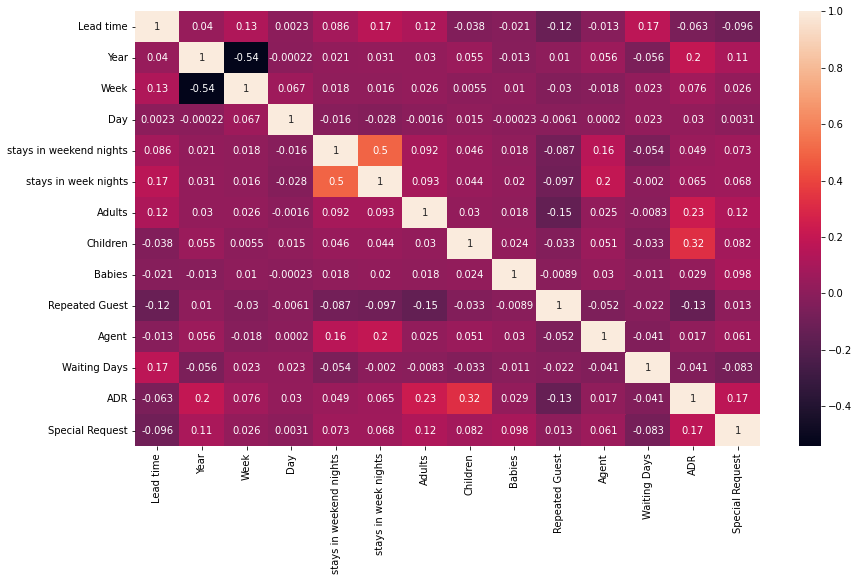

In [116]:
#Get corelation between different variables
corr = hotel_df2.corr(method = 'pearson')
plt.figure(figsize = (14,8))
sns.heatmap(corr,annot = True)
hotel_df2.columns

**From the above Corelation matrix we can conclude that Children and ADR are highly corelated.**

# **Outliers**

In [97]:
#Creating a function for box plot
def plot_box(df,f1,f2):
  df.boxplot(column = [f1,f2])
  plt.grid(False)
  plt.show()

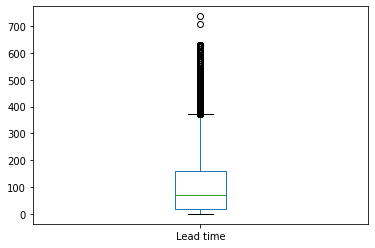

In [98]:
hotel_df2.boxplot(['Lead time'])
plt.grid(False)
plt.show()

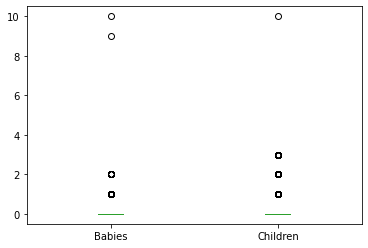

In [99]:
plot_box(hotel_df2,'Babies','Children')

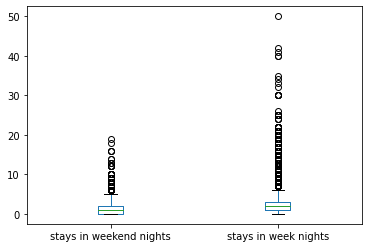

In [100]:
plot_box(hotel_df2,'stays in weekend nights',	'stays in week nights')

# **Univariate Analysis**

---







In [101]:
#To count the number of customers of different types
hotel_df2['Customer Type'].value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: Customer Type, dtype: int64

In [102]:
#To count the number of customers of different types in Percentage
(hotel_df2['Customer Type'].value_counts()/hotel_df2.shape[0])*100

Transient          75.059050
Transient-Party    21.043638
Contract            3.414021
Group               0.483290
Name: Customer Type, dtype: float64

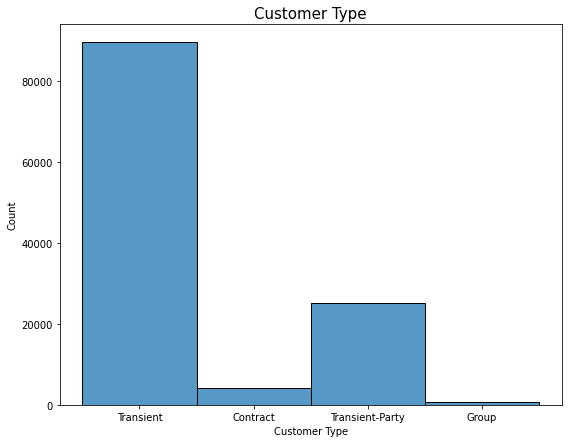

In [103]:
#Getting maximum number of customers are of which type
plt.figure(figsize = (9,7))
sns.histplot(hotel_df2['Customer Type'],palette = 'cubehelix')
plt.title('Customer Type',fontsize = 15)
plt.show()

**Coclusion** : 75% customers are Transient type

*   21% customers are Transient party type and rest are in between 0-3%









In [104]:
#Finding top 10 countries having most number of customers
hotel_df2['Country'].value_counts()[:10]

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: Country, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


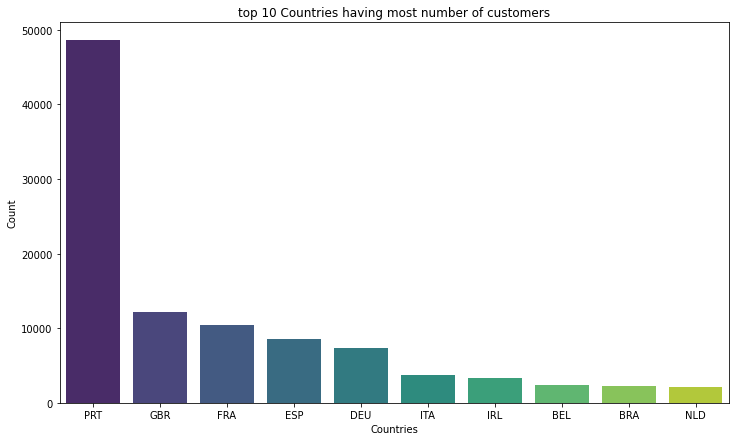

In [105]:
plt.figure(figsize = (12,7))
sns.barplot(hotel_df2['Country'].value_counts()[:10].index,hotel_df2['Country'].value_counts()[:10].values,palette = 'viridis')
plt.title('top 10 Countries having most number of customers')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.show()

**Conclusion** : According to research most number of customers are from Portugal followed by Great Britain and then Spain.

In [106]:
#Getting number of customers for different Distribution channel
hotel_df2['Distribution channel'].value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: Distribution channel, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


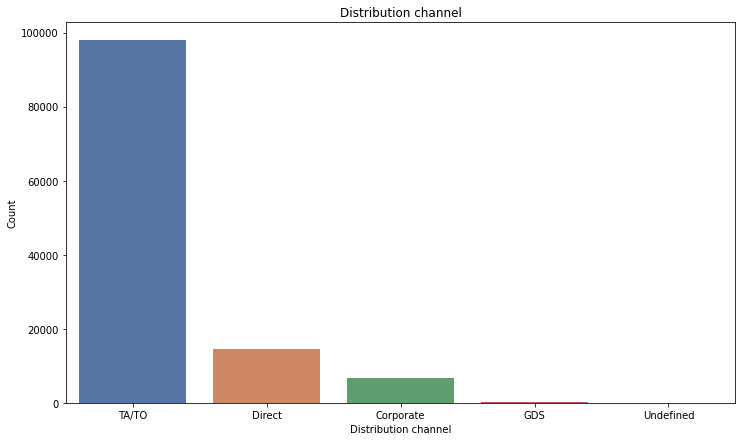

In [107]:
plt.figure(figsize = (12,7))
sns.barplot(hotel_df2['Distribution channel'].value_counts().index,hotel_df2['Distribution channel'].value_counts().values,palette = 'deep')
plt.title('Distribution channel')
plt.xlabel('Distribution channel')
plt.ylabel('Count')
plt.show()

**Coclusion** : As from above Barpot we can Coclude that most of the bookings are through Travel Agents followed by Direct Bookings.

In [108]:
year_val = hotel_df2['Year'].value_counts()
year_val

2016    56707
2017    40687
2015    21996
Name: Year, dtype: int64

<function matplotlib.pyplot.show>

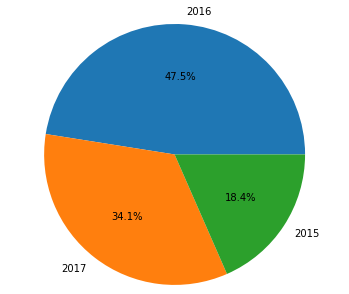

In [109]:
year_val = hotel_df2['Year'].value_counts()
year_labels = ['2016','2017','2015']
plt.axis('equal')
plt.pie(year_val,labels=year_labels,radius = 1.5,autopct = '%0.1f%%')
plt.show

### **Conclusion** : From above pie chart we conclude that maximum Customers are from year 2016 followed by 2017.

# **Bivariate Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


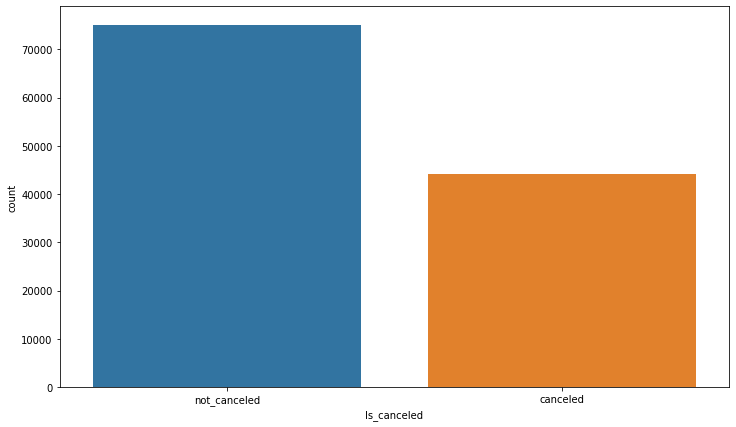

In [110]:
#analyzing canceled bookings data
plt.figure(figsize = (12,7))
hotel_df2['Is_canceled'] = hotel_df2.Is_canceled.replace([1,0], ['canceled', 'not_canceled'])
canceled_data = hotel_df2['Is_canceled']
sns.countplot(canceled_data)

**Conclusion :** Using a countplot, we were able to graph the total amout of canceled vs non-canceled data. It appears the majority of bookings were not canceled.

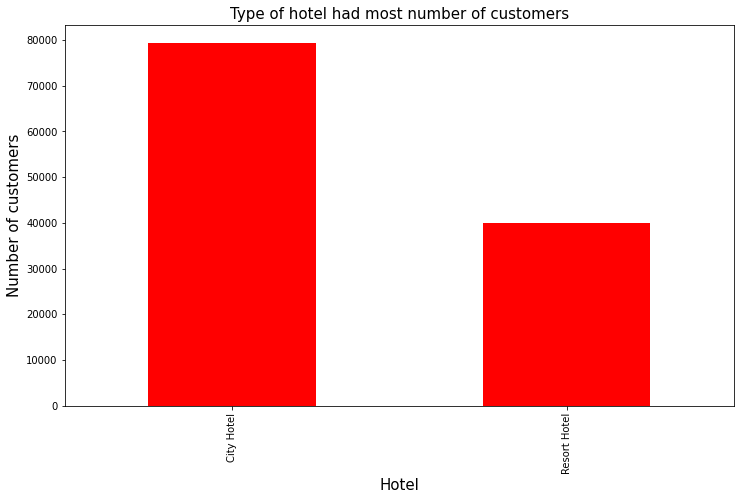

In [111]:
#Find out which type of hotel has most number of customers
plt.figure(figsize = (12,7))
hotel_df2.groupby(['Hotel'])['Year'].count().plot(kind='bar',colormap='autumn')
plt.title('Type of hotel had most number of customers',fontsize = 15)
plt.xlabel('Hotel',fontsize = 15)
plt.ylabel('Number of customers',fontsize = 15)
plt.show()

**Conclusion** : From above plot we conclude that City Hotel had most number of customers.

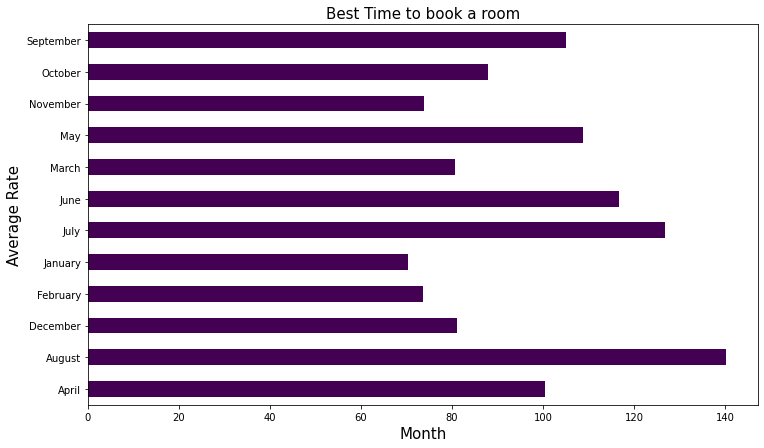

In [112]:
#find out best time to bbok the room
plt.figure(figsize=(12,7))
hotel_df2.groupby(['Month'])['ADR'].mean().plot(kind='barh',colormap='viridis')
plt.title('Best Time to book a room',fontsize = 15)
plt.xlabel('Month',fontsize = 15)
plt.ylabel('Average Rate',fontsize = 15)
plt.show()

**Conclusion** : From the above plot we get that January month has lowest Rate comparing to other months. Hence January is the best time to book the room. 

In [113]:
hotel_df2.groupby(['Distribution channel'])['Year'].count()

Distribution channel
Corporate     6677
Direct       14645
GDS            193
TA/TO        97870
Undefined        5
Name: Year, dtype: int64

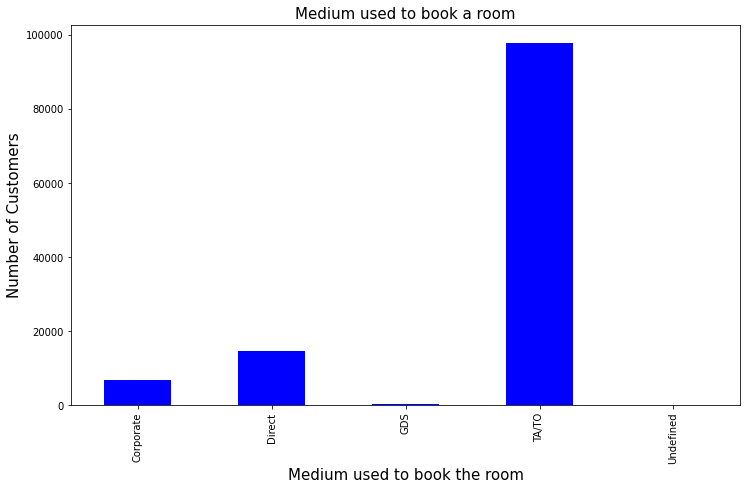

In [114]:
#find out which medium customers mostly used to book the room 
plt.figure(figsize = (12,7))
hotel_df2.groupby(['Distribution channel'])['Year'].count().plot(kind='bar',colormap='winter')
plt.title('Medium used to book a room',fontsize = 15)
plt.xlabel('Medium used to book the room',fontsize = 15)
plt.ylabel('Number of Customers',fontsize = 15)
plt.show()

**Conclusion** : From above graph we conclude that Most number of customer used travel agents to book their room.

Text(0.5, 1.0, 'Graph showing number of arrivals per year')

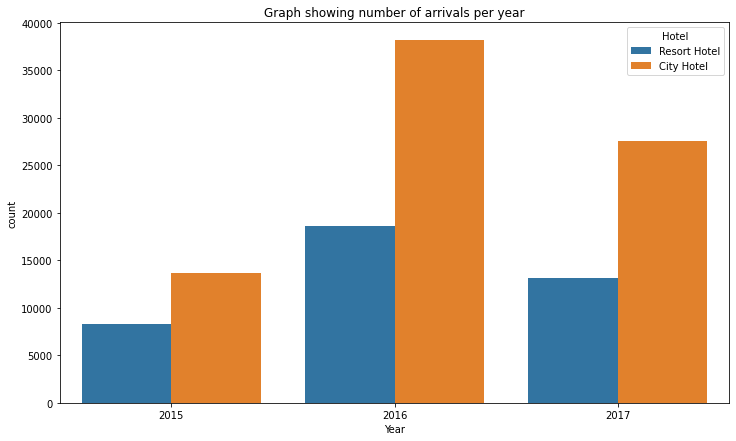

In [115]:
#Graph arrival year
plt.figure(figsize = (12,7))
arrival_list = ['Hotel', 'Year', 'Month', 'Day']
period_arrival = hotel_df2[arrival_list]

sns.countplot(data = period_arrival, x = 'Year', hue = 'Hotel').set_title('Graph showing number of arrivals per year')

**Conclusion** : In the plot above we can see that city hotels had the most bookings consistently each year with the largest amount of bookings in 2016.

# **Conclusion**

---



**After Performing Exploratory Data Analysis we get following insights from the data :**

*   City Hotel had most number of customers than Resort Hotel. 
*   January month has lowest Rate comparing to other months. Hence January is the best time to book the room.
*   Most number of customer used travel agents to book their room.
*   Maximum Hotel Bookings are during the year 2016 followed by 2017.
*   Most number of customers are of Transient Type.
*   Most number of customers are from Portugal followed by Great Britain and then Spain.
*   About 50% of all bookings are cancelled.
*   Highest daily rates occurred in the summer (June, July, August)







